In [34]:
from PIL import Image
import numpy as np
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download('stopwords')
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 1. Numpy Array

In [35]:
data = [30, 22, 47, 20, 46, 47, 37, 24, 40, 12, 43, 45, 44, 48, 24, 30, 15, 28, 21, 29, 17, 24, 41, 33, 23]
data = np.array(data)
start, end = 0, 5
print("Mảng arr: ", data)
print("5 phần tử đầu tiên của mảng", data[start:end])
print("5 phần tử cuối cùng của mảng", data[-1:-end - 1:-1])

Mảng arr:  [30 22 47 20 46 47 37 24 40 12 43 45 44 48 24 30 15 28 21 29 17 24 41 33
 23]
5 phần tử đầu tiên của mảng [30 22 47 20 46]
5 phần tử cuối cùng của mảng [23 33 41 24 17]


In [36]:
arr_2d = data.reshape(5, -1)
print("Mảng 2 chiều: \n", arr_2d)

Mảng 2 chiều: 
 [[30 22 47 20 46]
 [47 37 24 40 12]
 [43 45 44 48 24]
 [30 15 28 21 29]
 [17 24 41 33 23]]


In [37]:
arr_even = arr_2d[arr_2d % 2 == 0]
arr_odd = arr_2d[arr_2d % 2 != 0]

print("Các phần tử có giá trị là số chẵn: \n", arr_even)
print("Các phần tử có giá trị là số lẻ: \n", arr_odd)

Các phần tử có giá trị là số chẵn: 
 [30 22 20 46 24 40 12 44 48 24 30 28 24]
Các phần tử có giá trị là số lẻ: 
 [47 47 37 43 45 15 21 29 17 41 33 23]


In [38]:
print("Số phần tử có giá trị là số chẵn:", arr_even.shape[0])
print("Số phần tử có giá trị là số lẻ:", arr_odd.shape[0])

Số phần tử có giá trị là số chẵn: 13
Số phần tử có giá trị là số lẻ: 12


In [39]:
binary_matrix = np.where(arr_2d % 2 == 0, 0 , 1)
print("Mảng 2 chiều sau khi thay thế: \n", binary_matrix)

Mảng 2 chiều sau khi thay thế: 
 [[0 0 1 0 0]
 [1 1 0 0 0]
 [1 1 0 0 0]
 [0 1 0 1 1]
 [1 0 1 1 1]]


## 2. Game of Thones dialogue

In [40]:
snow_data = pd.read_csv(
    './data/Game_of_Thrones_jon_snow_data.csv', names=["conservation"])
snow_data.head()

,conservation
0,JON: Go on. Father’s watching.\r\n
1,JON: And your mother.\r\n
2,"JON: Don’t think too much, Bran.\r\n"
3,"JON/ROBB: Quick, Bran, faster!\r\n"
4,JON (to BRAN): Don’t look away.\r\n


### 2.1 Đọc dữ liệu và thực hiện chuẩn hóa 

In [41]:
def normalize(text: str):
    translator = str.maketrans('', '', string.punctuation)
    text = text.split(':')[1]

    text = text.replace('\r', '').replace('\n', '')
    text = text.lower()
    text = text.translate(translator)
    return text

### 2.3 Tạo biểu đồ Wordcloud

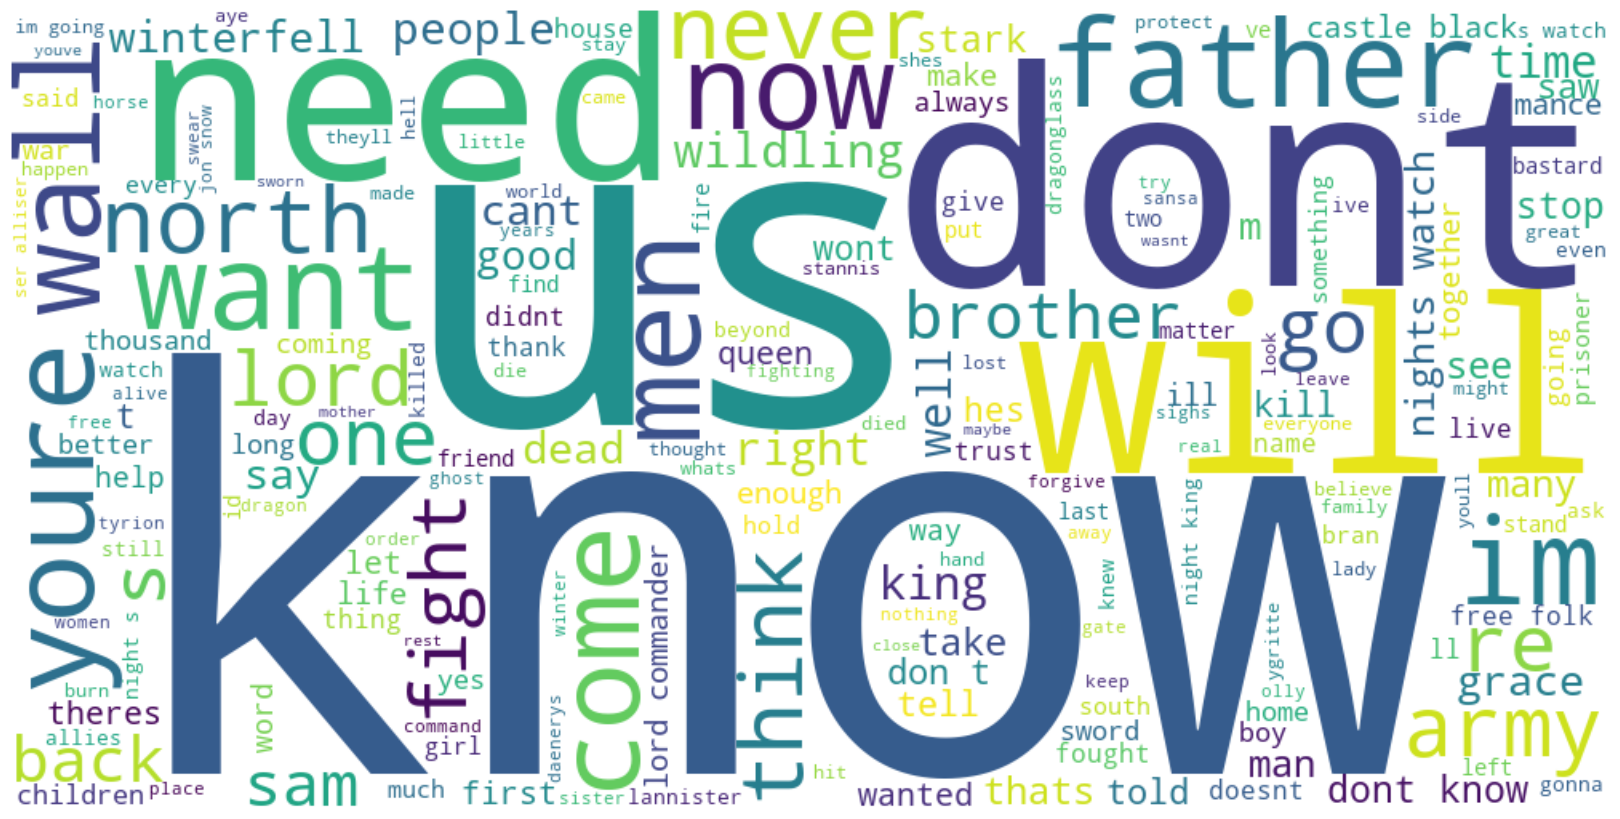

In [42]:
snow_data_normalize = [normalize(text) for text in snow_data['conservation']]

stopwords = STOPWORDS
world_cloud = WordCloud(width=1000, height=500,
                        background_color="white", stopwords=stopwords).generate_from_text(' '.join(snow_data_normalize))

plt.figure(figsize=(20, 8), facecolor=None)
plt.imshow(world_cloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### 2.3 

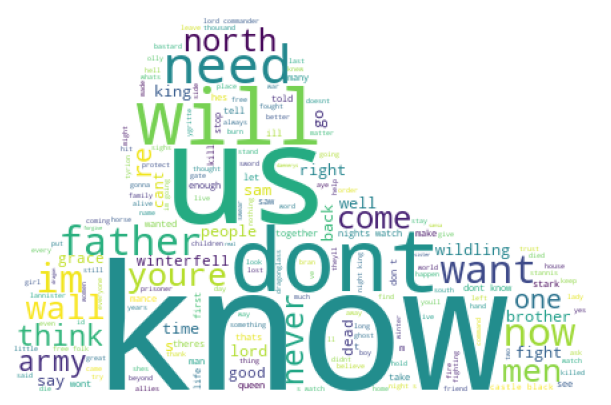

In [43]:
mask = np.array(Image.open("./data/jon-snow.jpg"))
wordcloud = WordCloud(
    width=1000,
    height=500,
    background_color="white",
    stopwords=STOPWORDS,
    mask=mask,

).generate(' '.join(snow_data_normalize))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud,)
plt.axis("off")
plt.show()

## 3. McDonald's menu

### 3.1 Đọc dữ liệu, hiển thị thông tin chung của dữ liệu

In [44]:
data_menu = pd.read_csv('./data/menu.csv')
data_menu.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [45]:
data_menu.tail()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
255,Smoothies & Shakes,McFlurry with Oreo Cookies (Small),10.1 oz (285 g),510,150,17.0,26,9.0,44,0.5,...,80,27,1,4,64,12,15,0,40,8
256,Smoothies & Shakes,McFlurry with Oreo Cookies (Medium),13.4 oz (381 g),690,200,23.0,35,12.0,58,1.0,...,106,35,1,5,85,15,20,0,50,10
257,Smoothies & Shakes,McFlurry with Oreo Cookies (Snack),6.7 oz (190 g),340,100,11.0,17,6.0,29,0.0,...,53,18,1,2,43,8,10,0,25,6
258,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Medium),14.2 oz (403 g),810,290,32.0,50,15.0,76,1.0,...,114,38,2,9,103,21,20,0,60,6
259,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Snack),7.1 oz (202 g),410,150,16.0,25,8.0,38,0.0,...,57,19,1,5,51,10,10,0,30,4


In [46]:
data_menu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

In [47]:
data_menu.describe()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,...,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,368.269231,127.096154,14.165385,21.815385,6.007692,29.965385,0.203846,54.942308,18.392308,495.750000,...,47.346154,15.780769,1.630769,6.530769,29.423077,13.338462,13.426923,8.534615,20.973077,7.734615
std,240.269886,127.875914,14.205998,21.885199,5.321873,26.639209,0.429133,87.269257,29.091653,577.026323,...,28.252232,9.419544,1.567717,6.307057,28.679797,11.426146,24.366381,26.345542,17.019953,8.723263
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,210.000000,20.000000,2.375000,3.750000,1.000000,4.750000,0.000000,5.000000,2.000000,107.500000,...,30.000000,10.000000,0.000000,0.000000,5.750000,4.000000,2.000000,0.000000,6.000000,0.000000
50%,340.000000,100.000000,11.000000,17.000000,5.000000,24.000000,0.000000,35.000000,11.000000,190.000000,...,44.000000,15.000000,1.000000,5.000000,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000
75%,500.000000,200.000000,22.250000,35.000000,10.000000,48.000000,0.000000,65.000000,21.250000,865.000000,...,60.000000,20.000000,3.000000,10.000000,48.000000,19.000000,15.000000,4.000000,30.000000,15.000000
max,1880.000000,1060.000000,118.000000,182.000000,20.000000,102.000000,2.500000,575.000000,192.000000,3600.000000,...,141.000000,47.000000,7.000000,28.000000,128.000000,87.000000,170.000000,240.000000,70.000000,40.000000


### 3.2

<Axes: xlabel='Total Fat', ylabel='Density'>

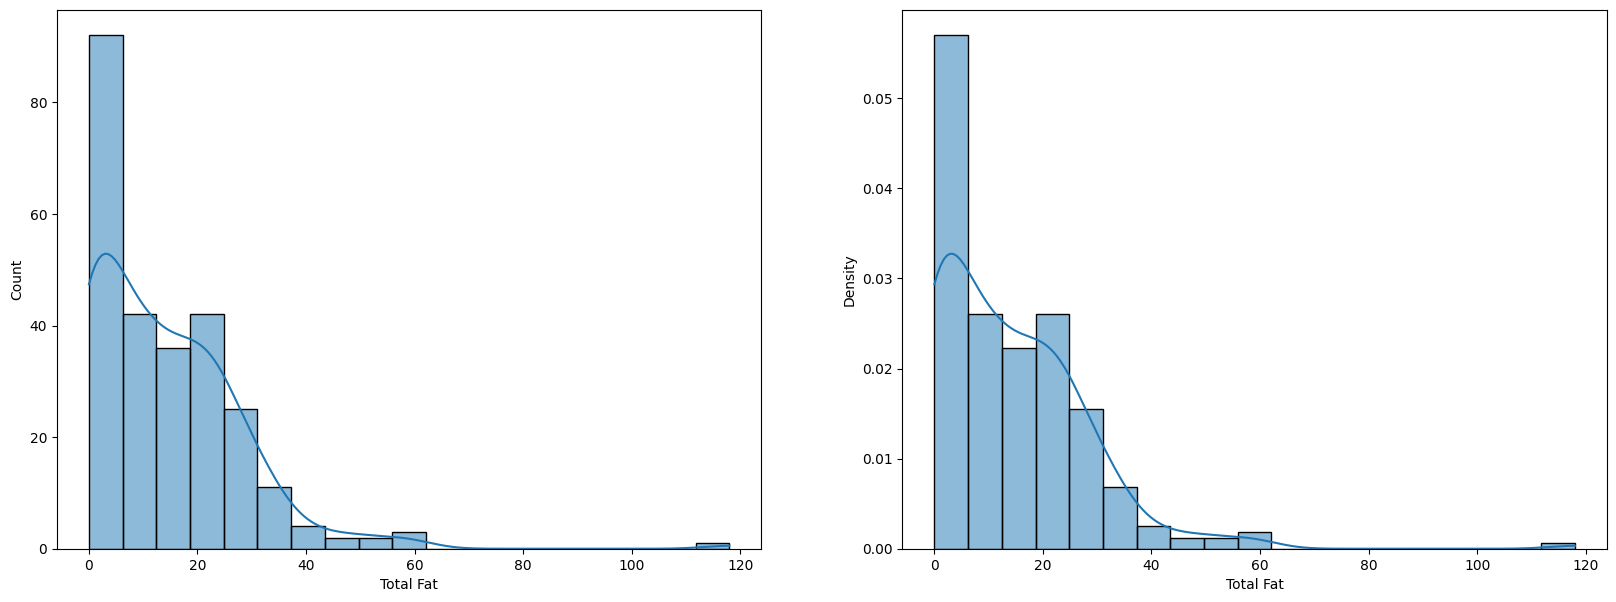

In [48]:
fig, ax = plt.subplots(1, 2, figsize=(20, 7))

ax[0].set_xlabel("Total Fat")
sns.histplot(data=data_menu, x="Total Fat", ax=ax[0], kde=True)


ax[1].set_xlabel("Total Fat")
sns.histplot(data=data_menu, x="Total Fat", ax=ax[1], stat="density", kde=True,)

### 3.4 

Hệ số tương quan giữa Total Fat và Calories là: 0.904409157392784


<Axes: xlabel='Total Fat', ylabel='Calories'>

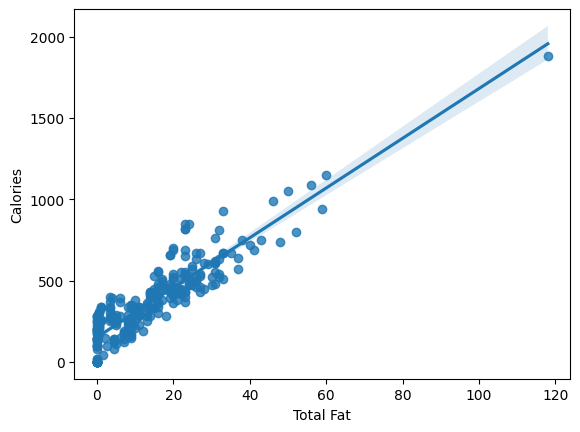

In [49]:
Total_fat = data_menu["Total Fat"].to_numpy()
Calories = data_menu["Calories"].to_numpy()

corr_fat_calo = np.corrcoef(Total_fat,Calories)[0, 1]

print(f"Hệ số tương quan giữa Total Fat và Calories là: {corr_fat_calo}")

sns.regplot(x=data_menu["Total Fat"], y=data_menu["Calories"])

### 3.5 Vẽ biểu đồ thể hiện sự tương quan giữa Total Fat và Calories theo từng nhóm thực phẩm

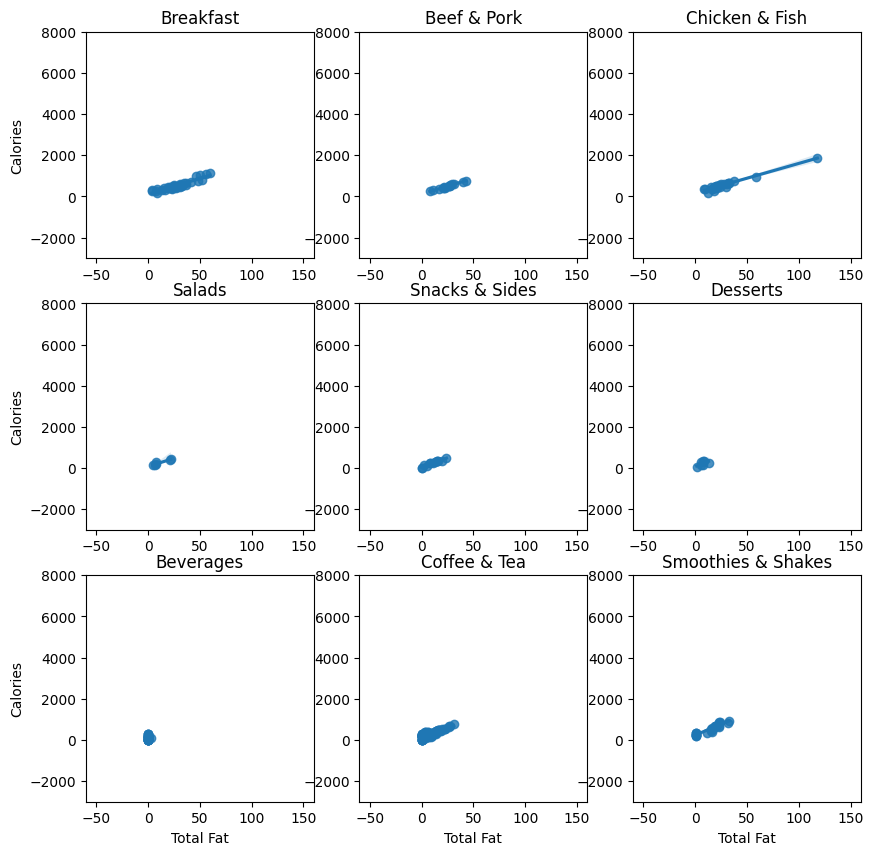

In [50]:
Category_uni = data_menu['Category'].unique().tolist()

fig , ax = plt.subplots(3, 3, figsize=(10, 10))

for index, category in enumerate(Category_uni):
    data_plot = data_menu.loc[data_menu['Category'] == Category_uni[index]]
    row = index // 3  # Xác định hàng
    col = index % 3   # Xác định cột
    sns.regplot(x=data_plot["Total Fat"], y=data_plot["Calories"], ax=ax[row, col])
    ax[row, col].set_title(category)
    # Chỉ đặt nhãn x cho hàng cuối cùng
    if row == 2:
        ax[row, col].set_xlabel('Total Fat')
    else:
        ax[row, col].set_xlabel('')

    # Chỉ đặt nhãn y cho cột đầu tiên
    if col == 0:
        ax[row, col].set_ylabel('Calories')
    else:
        ax[row, col].set_ylabel('')

    ax[row, col].set_xlim(-60, 160)
    ax[row, col].set_ylim(-3000, 8000)
    ax[row, col].set_xticks([-50, 0, 50, 100, 150])
    ax[row, col].set_yticks([-2000, 0, 2000, 4000, 6000, 8000])

### 3.6

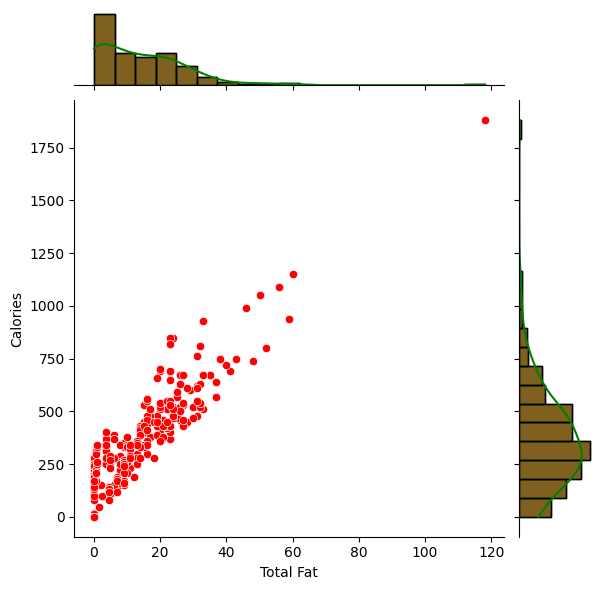

In [51]:
joint_plot = sns.jointplot(
    x='Total Fat',
    y='Calories',
    data=data_menu,
    kind='scatter',  # Loại biểu đồ trung tâm
    color='red',  # Màu của các điểm trên scatter plot
)

joint_plot.plot_marginals(sns.histplot, color="green", kde = True)

plt.show()

### 3.7 : Giữa Total Fat và Calories có sự tương quan, và tương quan thuận, phần lớn data tập trung total fat từ 0 dến 40 ứng với 0 đến 500 calories

### 3.8 

Text(0.5, 1.0, 'Biểu đồ BoxPlot kiểm tra Outlier của Sodium')

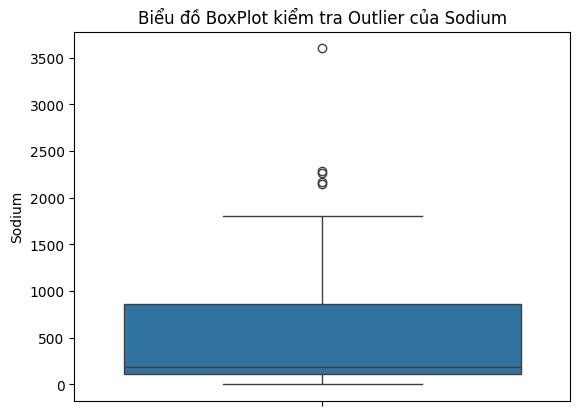

In [52]:
sns.boxplot(data=data_menu, y="Sodium")
plt.title('Biểu đồ BoxPlot kiểm tra Outlier của Sodium')

Text(0.5, 1.0, 'Biểu đồ BoxPlot không có Outlier của Sodium')

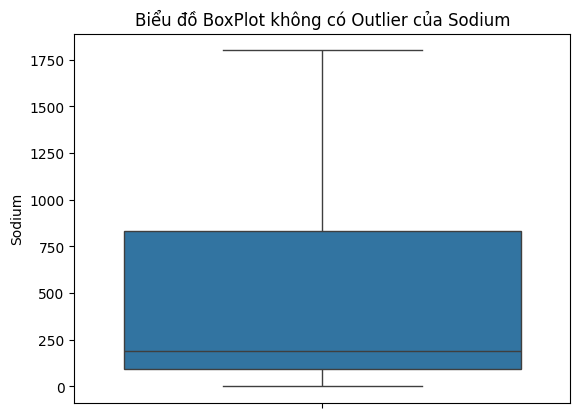

In [53]:
# Lấy Q1 và Q3 cho cột 'Sodium'
q1_sodium = data_menu.describe().loc['25%', 'Sodium']
q3_sodium = data_menu.describe().loc['75%', 'Sodium']

# Tính IQR
iqr = q3_sodium - q1_sodium

# Xác định ngưỡng outlier thấp và cao
outlier_low = q1_sodium - (1.5 * iqr)
outlier_high = q3_sodium + (1.5 * iqr)

# Loại bỏ các outlier
data_without_outlier = data_menu.loc[(data_menu['Sodium'] > outlier_low) &
                                     (data_menu['Sodium'] < outlier_high)]

sns.boxplot(data=data_without_outlier, y="Sodium")
plt.title('Biểu đồ BoxPlot không có Outlier của Sodium')

### 3.9 


In [72]:
category_count = data_menu.value_counts(subset='Category').reset_index(name= 'Item_counts')
category_count

,Category,Item_counts
0,Coffee & Tea,95
1,Breakfast,42
2,Smoothies & Shakes,28
3,Beverages,27
4,Chicken & Fish,27
5,Beef & Pork,15
6,Snacks & Sides,13
7,Desserts,7
8,Salads,6


### 3.10

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6460\1409337667.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_count, x='Category', y='Item_counts', palette='set2')


ValueError: 'set2' is not a valid palette name

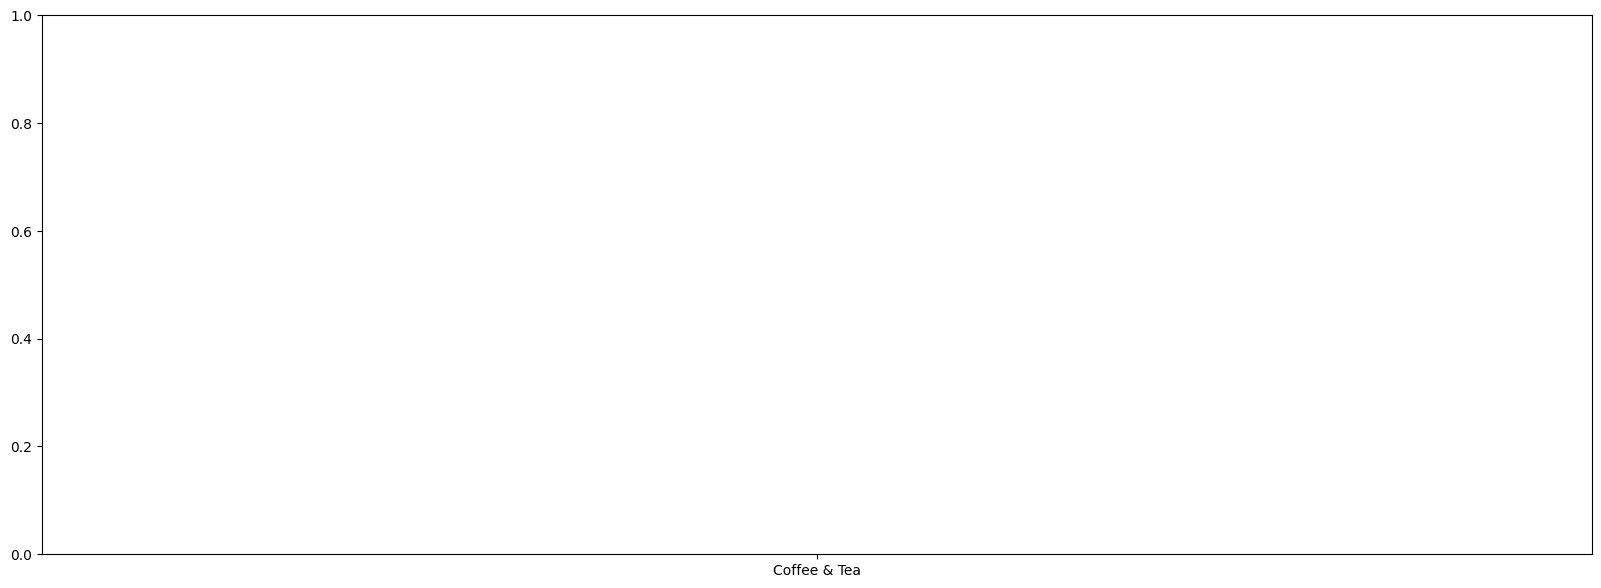

In [77]:
plt.figure(figsize=(20,7))
sns.barplot(data=category_count, x='Category', y='Item_counts', palette='Set2')
plt.xticks(rotation=45, ha='right')  # Xoay chữ 45 độ, căn phải

## 4. Trực quan hóa dữ liệu bản đồ

### 4.1 

In [54]:
population_data = pd.read_csv('./data/world_countries_population_2020.csv', sep=';')

In [55]:
population_data.head()

,Country,Population,Land Area (km2)
0,Afghanistan,"38,928,346","652,860"
1,Albania,"2,877,797","27,400"
2,Algeria,"43,851,044","2,381,740"
3,Andorra,"77,265",470
4,Angola,"32,866,272","1,246,700"


In [56]:
population_data.tail()

,Country,Population,Land Area (km2)
194,Western Sahara,"567,402","266,000"
195,West Bank,"3,340,143","5,655"
196,Yemen,"29,825,964","527,970"
197,Zambia,"18,383,955","743,390"
198,Zimbabwe,"14,862,924","386,850"


In [57]:
population_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Country          199 non-null    object
 1   Population       199 non-null    object
 2   Land Area (km2)  199 non-null    object
dtypes: object(3)
memory usage: 4.8+ KB


In [58]:
population_data.describe()

,Country,Population,Land Area (km2)
count,199,199,199
unique,199,199,197
top,Afghanistan,"38,928,346",700
freq,1,1,2


### 4.2 

In [59]:
# gán kết quả của phép chuyển đổi trở lại cột, điều này có hiệu quả tương tự như inplace.
population_data['Land Area (km2)'] = population_data['Land Area (km2)'].str.replace(',','').astype(float)
population_data['Population'] = pd.to_numeric(population_data['Population'].str.replace(',', ''), errors='coerce')
population_data.head()

,Country,Population,Land Area (km2)
0,Afghanistan,38928346,652860.0
1,Albania,2877797,27400.0
2,Algeria,43851044,2381740.0
3,Andorra,77265,470.0
4,Angola,32866272,1246700.0


### 4.3

In [60]:
import folium

# Tạo bản đồ có kiểu cartodbpositron với center là Ấn Độ (location=[20.5937, 78.9629]) và
# zoom level (zoom_start=3)
india_lat = 20.5937
india_lon = 78.9629

indian_map = folium.Map(
    location=[india_lat, india_lon], zoom_start=3)

folium.TileLayer("CartoDB Positron").add_to(indian_map)

indian_map


In [68]:
import json
with open('./data/world-countries.json') as f:
    geojson_countries = json.load(f)


for i in geojson_countries['features']:
    i['id'] = i['properties']['name']

folium.Choropleth(geo_data=geojson_countries,
                  name="choropleth",
                  data=population_data,
                  columns=['Country', 'Population'],
                  key_on='feature.id',
                  fill_color='YlOrRd',
                  fill_opacity=0.7,
                  line_opacity=0.2,
                  legend_name='Bản đồ thể hiện dân số quốc gia'
                  ).add_to(indian_map)

indian_map